In [120]:
# Import the Pandas package
import pandas as pd

# Import the NumPy package
import numpy as np

# import fundamental plotting library in Python
import matplotlib.pyplot as plt

# Instruct jupyter to plot in the notebook
%matplotlib inline

In [121]:
df = pd.read_csv("eo_il.csv")

In [122]:
df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
0,3390819,REP RESOURCES EMPOWERING PARENTS,NaN,710 CR 1350 N,SULLIVAN,IL,61951-0000,0,3,3,...,0,0,2,0,12,NaN,NaN,NaN,P82,NaN
1,10438881,SHADY NOOK IMPROVEMENT ASSOCIATION INC,NaN,629 W ELM ST,WHEATON,IL,60189-6352,0,4,3,...,5,3,1,0,12,767201.0,85303.0,82703.0,NaN,NaN
2,10482439,MODERN WOODMEN OF AMERICA,% CHAPTER SERVICE DEPT,1701 1ST AVE,ROCK ISLAND,IL,61201-8724,1519,8,9,...,0,0,2,0,12,0.0,0.0,0.0,NaN,10532
3,10492125,ALLIANCE OF INDEPENDENT ACADEMIC MEDICAL CENTERS,% F STEPHEN LARNED MD,401 N MICHIGAN AVE STE 1200,CHICAGO,IL,60611-4264,0,3,3,...,4,4,1,0,12,486525.0,493984.0,493984.0,H05,NaN
4,10516987,ASSOCIATION OF PEDIATRIC ONCOLOGY NURSES,% DAVE BERGESON,8735 W HIGGINS RD STE 300,CHICAGO,IL,60631-2738,9342,3,9,...,0,0,2,0,12,0.0,0.0,0.0,NaN,APHON MAINE CHAPTER


In [123]:
df.shape

(70509, 28)

In [126]:
df["CLASSIFICATION"].head()

0    1200
1    1000
2    1000
3    2000
4    2000
Name: CLASSIFICATION, dtype: int64

In [127]:
df["CLASSIFICATION"].tail()

70504    2000
70505    1000
70506    1000
70507    7000
70508    2000
Name: CLASSIFICATION, dtype: int64

In [128]:
classification = df["CLASSIFICATION"]

class_count below pretty much shows that the majority of non-profits in Illinois are Non-profits classified as:
1000, 2000, 7000, 1200, 3000, 1700, 1270, 7100, 2100, 4000

34965 are classified as 1000 = "Charitable organizations"

This website explains the classifications:
https://www.kb.blackbaud.co.uk/articles/Article/26476#:~:text=The%20code%20may%20be%20a,2%20(Charitable%20and%20Educational).

In [129]:
class_count = classification.value_counts()
class_count

1000    34965
2000    10589
7000     9274
1200     6775
3000     3509
1700     1181
1270      662
7100      537
2100      459
4000      296
1230      231
2700      221
1300      213
2800      181
1280      179
7200      105
1400      103
1250       89
1237       86
2300       82
1278       70
7120       66
8000       62
1240       58
1238       52
1235       48
1800       40
6000       32
0          31
5000       30
        ...  
1247        2
1256        2
9000        2
1258        2
1380        2
2180        1
7800        1
1920        1
4600        1
2310        1
1670        1
1290        1
2160        1
2570        1
9500        1
8100        1
2410        1
1568        1
7900        1
1820        1
1370        1
2350        1
5710        1
2710        1
6100        1
2480        1
2450        1
5200        1
2356        1
1246        1
Name: CLASSIFICATION, Length: 95, dtype: int64

In [74]:
# Let's define our bins (the boundaries of the subgroups)
bins = [0,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,11000] 
freq  = pd.cut(df["CLASSIFICATION"], bins=bins) 
freq = freq.value_counts(sort=False) # Now we count the number of elements inside each bin. We use sort=False to avoid having our groups sorted by size
freq # The result is our frequency table. Freq is actually a Series in which the index is the bins and the data are the counts

(0, 1000]         34967
(1000, 2000]      20511
(2000, 3000]       4503
(3000, 4000]        324
(4000, 5000]         47
(5000, 6000]         36
(6000, 7000]       9275
(7000, 8000]        801
(8000, 9000]         13
(9000, 10000]         1
(10000, 11000]        0
Name: CLASSIFICATION, dtype: int64

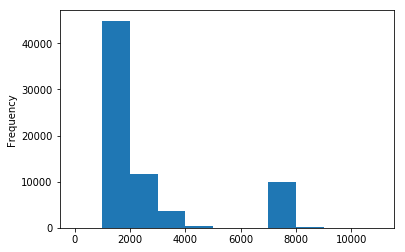

In [75]:
df["CLASSIFICATION"].plot.hist(bins=bins) # Pandas computes the frequency table under the hood and plots it 

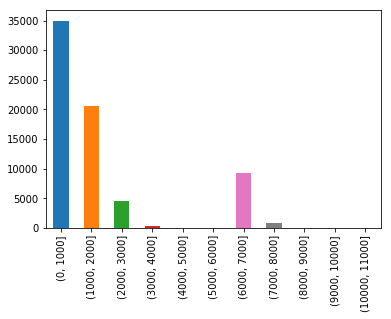

In [76]:
freq.plot.bar() # Since freq is a Series, we can use .plot.bar() to easily create a barplot

In [130]:
#filter for np's classified as 1000's

N_1000_symbol = df["CLASSIFICATION"] == 1000 
N_1000_symbol.head()

0    False
1     True
2     True
3    False
4    False
Name: CLASSIFICATION, dtype: bool

In [131]:
#sector off np's classified as 1000's

N_1000 = df[N_1000_symbol] # We tell Pandas to only include the rows for which are_you_DUK is True.
N_1000.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
1,10438881,SHADY NOOK IMPROVEMENT ASSOCIATION INC,NaN,629 W ELM ST,WHEATON,IL,60189-6352,0,4,3,...,5,3,1,0,12,767201.0,85303.0,82703.0,NaN,NaN
2,10482439,MODERN WOODMEN OF AMERICA,% CHAPTER SERVICE DEPT,1701 1ST AVE,ROCK ISLAND,IL,61201-8724,1519,8,9,...,0,0,2,0,12,0.0,0.0,0.0,NaN,10532
8,10552691,FULCRUM POINT NEW MUSIC PROJECT,% S BURNS,410 S MICHIGAN AVE STE 943,CHICAGO,IL,60605-1399,0,3,3,...,2,4,1,0,12,20749.0,302680.0,302680.0,A68,NaN
9,10556625,MAAK FOUNDATION,% ELLIOTT M FRIEDMAN,FH 1313 W 175TH STREET,HOMEWOOD,IL,60430-0000,0,3,3,...,5,4,0,1,6,970264.0,385398.0,NaN,T22,NaN
11,10558182,JCPE INVESTMENTS N F P,% JOHN G SAHN,2724 W RESERVOIR BLVD,PEORIA,IL,61615-4137,0,2,3,...,9,8,1,0,3,64612938.0,17820008.0,2997058.0,S47,NaN


In [132]:
#subsection value count of np's with 1000 as classification

N_1000_sub = N_1000["SUBSECTION"]
N_1000_sub.value_counts()

3     24765
8      2780
7      1798
19     1408
4       859
6       708
10      642
92      487
5       347
9       313
13      207
14      177
2       177
25      110
91       89
12       43
15       38
17        6
1         5
40        3
16        1
18        1
29        1
Name: SUBSECTION, dtype: int64

In [133]:
##filter for np's classified as 1000's and subsection 3

sub3 = N_1000["SUBSECTION"] == 3
sub3.head()

1     False
2     False
8      True
9      True
11    False
Name: SUBSECTION, dtype: bool

In [85]:
#np's 1000 class and subsection 3 only

N_1000_sub3 = N_1000[sub3]
N_1000_sub3.tail()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
70495,986057022,NATURE CONSERVATION TR,% HOWARD G BUFFETT,145 N MERCHANT ST,DECATUR,IL,62523-1216,0,3,3,...,9,9,0,1,12,62078496.0,55621034.0,NaN,C20,BUFFETT HOWARD G ET AL TTEE
70496,986086945,BARNHART FOUNDATION TR,% CURTIS BARNHART,5847 S NORMANDY AVE,CHICAGO,IL,60638-3301,0,3,3,...,1,1,0,1,12,1.0,150.0,NaN,T22,CURTIS MICHAEL BARNHART TTEE
70503,990324595,ANONYMOUS PRESS INC,NaN,1658 MILWAUKEE AVE 100-2883,CHICAGO,IL,60647-6905,0,3,3,...,4,4,1,0,12,237535.0,313559.0,184009.0,A33,NaN
70505,990367195,HAPPY CHILDHOOD FOUNDATION,% GIDLEY MANAGEMENT GROUP INC,4210 W IRVING PARK RD,CHICAGO,IL,60641-2935,0,3,3,...,2,1,2,0,12,14362.0,4890.0,4890.0,E70,NaN
70506,990382020,SOLEA WATER,% RACHAEL PACE,2599 LYNCH AVE,GRANITE CITY,IL,62040-2914,0,3,3,...,3,3,1,0,12,39543.0,79977.0,79977.0,K20,WATER FOR PANAMA


In [ ]:
This pdf explaines affiliations

https://www.irs.gov/pub/irs-soi/eo_info.pdf

In [83]:
#Affiliation counts for np's 1000 class and subsection only 3
#This reveals that most affiliations are 1000 class/subsection 3/affiliation 3
N_1000_sub3_aff = N_1000_sub3["AFFILIATION"]
N_1000_sub3_aff.value_counts()

3    23364
9     1255
1       58
6       45
0       33
2        9
8        1
Name: AFFILIATION, dtype: int64

In [87]:
#value count for np subsections classified as 1000 and subsection 3

sub_count = sub3.value_counts()
sub_count

True     24765
False    10200
Name: SUBSECTION, dtype: int64

Most of the classified 1000's are in subsection 3. Which is 501c3.

This website talks about subsections.

https://learn.guidestar.org/help/irs-subsection-codes

In [91]:
#filter for np's class 1000/ sub 3/ affiliated as 3's


N_1000_sub3_aff3 = N_1000_sub3["AFFILIATION"] == 3


In [92]:
#sector off np's classified as 1000's / sub 3/affiliated as 3's

N_1000_sub3_aff3_df = N_1000_sub3[N_1000_sub3_aff3] # We tell Pandas to only include the rows for which are_you_DUK is True.
N_1000_sub3_aff3_df.head()

,EIN,NAME,ICO,STREET,CITY,STATE,ZIP,GROUP,SUBSECTION,AFFILIATION,...,ASSET_CD,INCOME_CD,FILING_REQ_CD,PF_FILING_REQ_CD,ACCT_PD,ASSET_AMT,INCOME_AMT,REVENUE_AMT,NTEE_CD,SORT_NAME
8,10552691,FULCRUM POINT NEW MUSIC PROJECT,% S BURNS,410 S MICHIGAN AVE STE 943,CHICAGO,IL,60605-1399,0,3,3,...,2,4,1,0,12,20749.0,302680.0,302680.0,A68,NaN
9,10556625,MAAK FOUNDATION,% ELLIOTT M FRIEDMAN,FH 1313 W 175TH STREET,HOMEWOOD,IL,60430-0000,0,3,3,...,5,4,0,1,6,970264.0,385398.0,NaN,T22,NaN
13,10567661,ASIAN HUMAN SERVICES FAMILY HEALTH CENTER INC,% LISA COWHEY CFO,2424 W PETERSON AVENUE,CHICAGO,IL,60659-4100,0,3,3,...,7,8,1,0,6,9774220.0,10452874.0,10452874.0,E30,NaN
18,10577003,LAWRENCE COUNTY ARTS COUNCIL,% JOHN CLARK,PO BOX 127,LAWRENCEVILLE,IL,62439-0127,0,3,3,...,0,0,2,0,12,0.0,0.0,0.0,A70,NaN
22,10587668,VISHWA JAGRATI MISSION OF NORTH AMERICA,% PRAVEEN VERMA,1436 RIDGEWOOD CIR,DOWNERS GROVE,IL,60516-1787,0,3,3,...,0,0,2,0,12,0.0,0.0,0.0,X70,NaN


This pdf explaines affiliations

https://www.irs.gov/pub/irs-soi/eo_info.pdf

In [119]:
#df.columns
#organiztion code looks good
#foundation code looks good
#all exlian on this website
#https://www.irs.gov/pub/irs-soi/eo_info.pdf
list(N_1000_sub3_aff3_df.columns)

['EIN',
 'NAME',
 'ICO',
 'STREET',
 'CITY',
 'STATE',
 'ZIP',
 'GROUP',
 'SUBSECTION',
 'AFFILIATION',
 'CLASSIFICATION',
 'RULING',
 'DEDUCTIBILITY',
 'FOUNDATION',
 'ACTIVITY',
 'ORGANIZATION',
 'STATUS',
 'TAX_PERIOD',
 'ASSET_CD',
 'INCOME_CD',
 'FILING_REQ_CD',
 'PF_FILING_REQ_CD',
 'ACCT_PD',
 'ASSET_AMT',
 'INCOME_AMT',
 'REVENUE_AMT',
 'NTEE_CD',
 'SORT_NAME']

In [117]:
#value count for foundations column in non profit class 1000/ subsection 3/ affiliation 3
#11260 are in foundation 15

test = N_1000_sub3_aff3_df['FOUNDATION']
test.value_counts()

15    11260
16     5242
4      5050
10      586
17      573
3       182
12      150
11      106
21       95
13       35
9        22
23       17
24       14
22       14
14        9
2         8
18        1
Name: FOUNDATION, dtype: int64

In [118]:
#value count for organizations column in non profit class 1000/ subsection 3/ affiliation 3
#20405 are in organization 1

test2 = N_1000_sub3_aff3_df['ORGANIZATION']
test2.value_counts()

1    20405
2     1988
5      873
0       38
6       32
3       27
4        1
Name: ORGANIZATION, dtype: int64

In [136]:
#value count for NTEE_CD column in non profit class 1000/ subsection 3/ affiliation 3
#970 are T20

test3 = N_1000_sub3_aff3_df['NTEE_CD']
test3.value_counts()

T20     970
P20     883
T22     856
B82     461
T30     430
O50     331
S20     252
X20     240
P99     233
D20     223
B11     222
Q33     220
N63     214
B94     208
T20Z    206
B90     186
N60     169
T50     164
T12     160
P80     159
X99Z    146
A80     140
Z99     139
P30     134
P60     134
B99     133
L20     131
K31     127
A65     126
A20     121
       ... 
X500      1
B9XZ      1
Q015      1
P61       1
S50C      1
P114      1
P33A      1
D113      1
P75I      1
X22P      1
H31Z      1
Q03       1
A700      1
G43C      1
D610      1
B129      1
Q017      1
X170      1
Y01       1
R240      1
A560      1
Q21Z      1
N117      1
F02       1
E196      1
A33P      1
G97Z      1
A40Z      1
S010      1
I117      1
Name: NTEE_CD, Length: 1366, dtype: int64